## AutoMobile Price Prediction

### Nishant Sharma (Data Science OCT 03)

In [1]:
#import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
#I made some some changes in make column using excel, Please prefer my data file.
df = pd.read_csv("AutoData.csv") #Read CSV File
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [4]:
df.isnull().sum().sum() #check for null values

0

## EDA

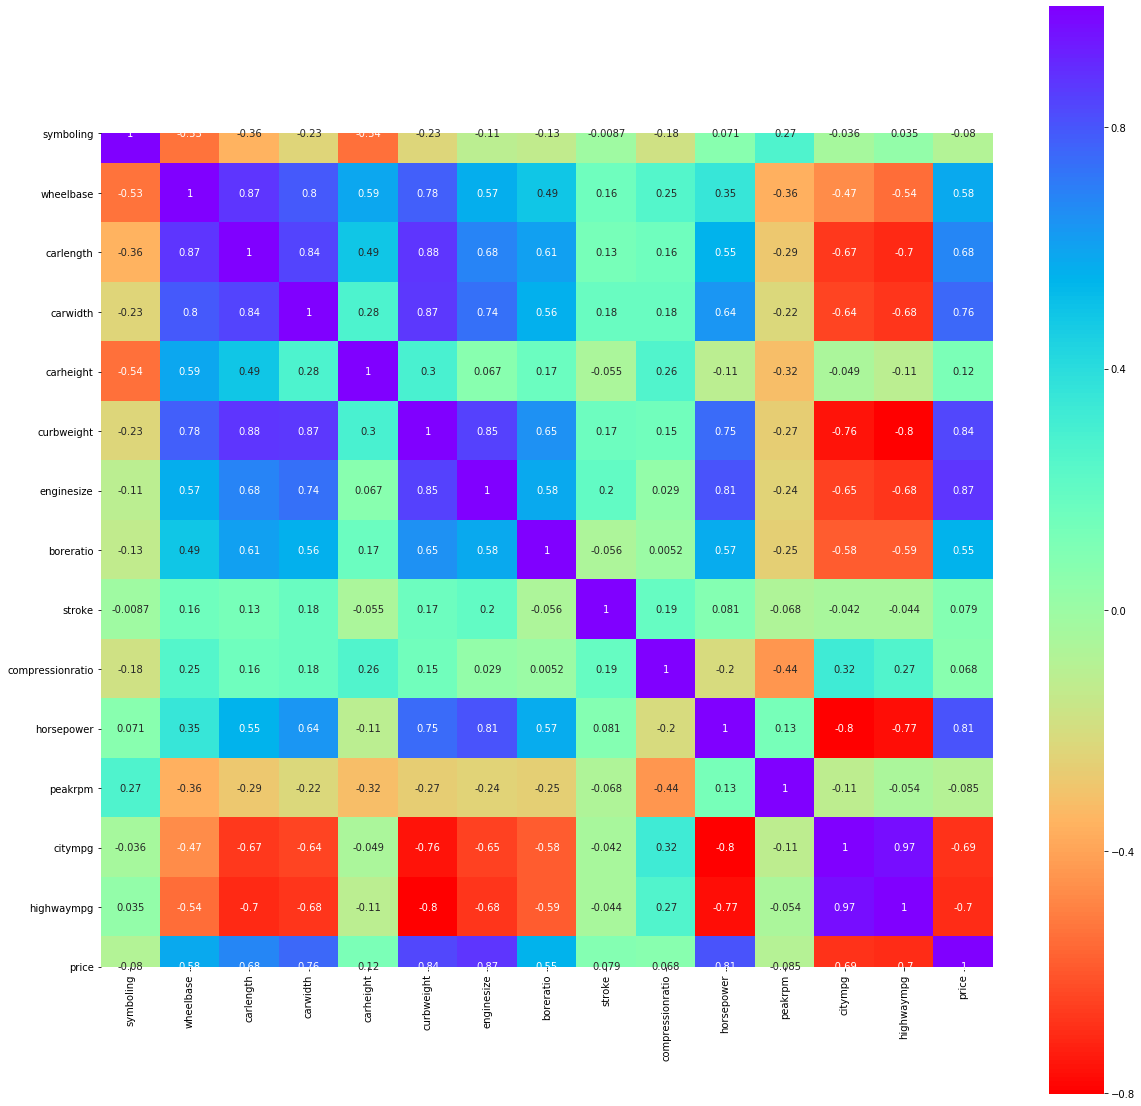

In [5]:
# check the correlation b/w variables
plt.subplots(figsize = (20,20))
heatmap = sns.heatmap(df.corr(), annot = True, cmap="rainbow_r", square=True)

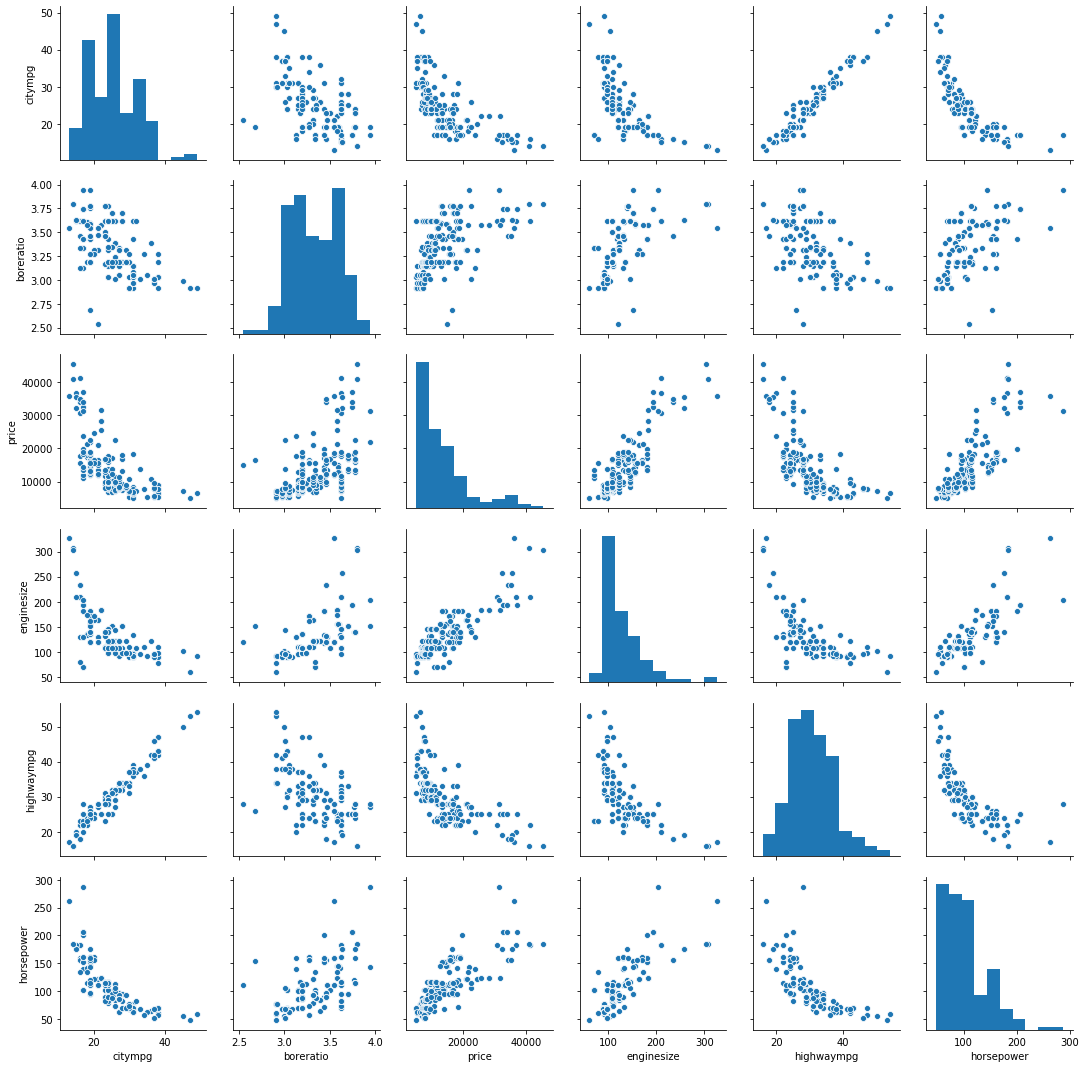

In [7]:
# choose the best correlaed variable for pairplot for more visualization.
var = df[{'enginetype','boreratio','horsepower', 'citympg', 'highwaympg','enginesize','price'}]
sns.pairplot(var);

In [8]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [9]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [10]:
num_dict =  {"doornumber" : {"four": 4,"two":2},
    
             "cylindernumber": {"four":4, "six":6,"five":5,"eight":8,"two":2,"twelve":12,"three":3}
    
}

In [11]:
df.replace(num_dict,inplace=True)
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [13]:
#OHC engines are more effective than others that's why I choose '1' for it and other '0' 
engine_dict =  {"enginetype" : {"ohc":1,"ohcf":1,"ohcv":1,"doch":1,"l":0,"rotor":0,"dohcv":1,"dohc":1}}
df.replace(engine_dict,inplace=True)
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
df.dtypes

symboling             int64
make                 object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [18]:
# import sklearn for label encoding
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['make']= label_encoder.fit_transform(df['make']) 
df['make'].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10,  4, 11, 12,  0, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int64)

In [22]:
for i in list(df.select_dtypes(include = ['object'])):
    df[i]= label_encoder.fit_transform(df[i]) 
    df[i].unique()
    

In [25]:
df.dtypes

symboling             int64
make                  int32
fueltype              int32
aspiration            int32
doornumber            int64
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [26]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,2,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,2,1,0,4,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,2,1,0,4,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


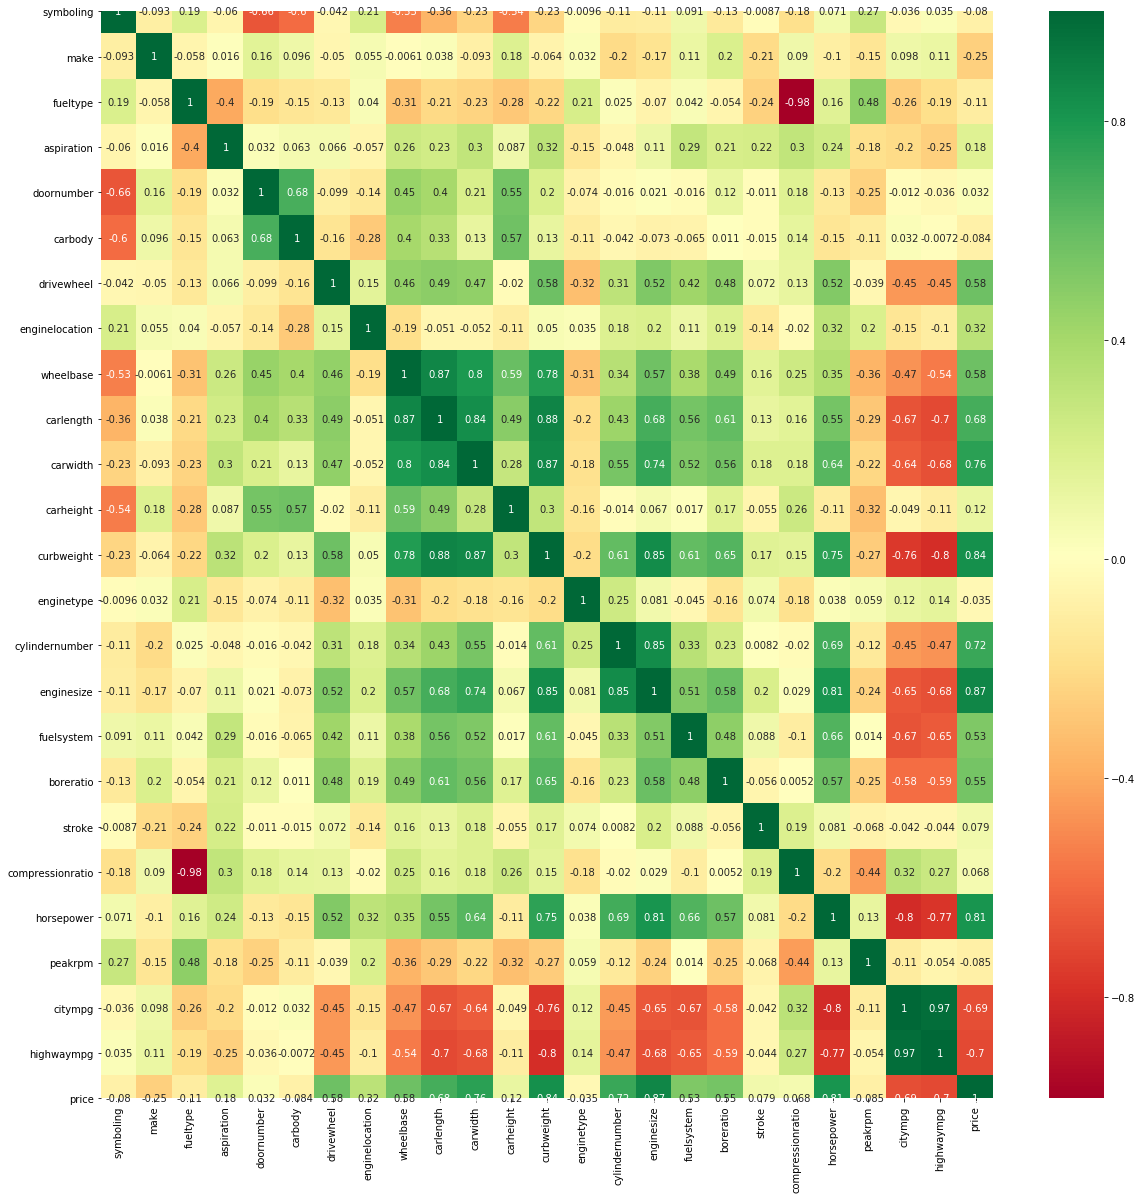

In [27]:
#finding correlation b/w variables after label encoding
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Selection of Best Variable

In [28]:
df1 = df[['enginesize','curbweight','horsepower','highwaympg', 'carlength','carwidth','citympg','price']].copy()
df1.head()

,enginesize,curbweight,horsepower,highwaympg,carlength,carwidth,citympg,price
0,130,2548,111,27,168.8,64.1,21,13495.0
1,130,2548,111,27,168.8,64.1,21,16500.0
2,152,2823,154,26,171.2,65.5,19,16500.0
3,109,2337,102,30,176.6,66.2,24,13950.0
4,136,2824,115,22,176.6,66.4,18,17450.0


In [30]:
X = df1.iloc[:,:-1]
Y = df1.iloc[:,-1:]

In [31]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state=0)

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=50,random_state=0)
rf_model = rf_reg.fit(X_train,Y_train)
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

### Prediction On Test Data

In [45]:
test_prediction = pd.DataFrame(rf_model.predict(X_test))

In [46]:
Y_test, test_prediction

(       price
 52    6795.0
 181  15750.0
 5    15250.0
 18    5151.0
 188   9995.0
 ..       ...
 198  18420.0
 143   9960.0
 24    6229.0
 30    6479.0
 135  15510.0
 
 [62 rows x 1 columns],                0
 0    6155.320000
 1   15974.080000
 2   13310.710000
 3    5703.580000
 4    9468.620000
 ..           ...
 57  18491.136700
 58   9205.373333
 59   6470.080000
 60   5718.920000
 61  12976.800000
 
 [62 rows x 1 columns])

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(Y_test, test_prediction)

0.908958169569263

### Factors that drive price

'enginesize','curbweight','horsepower','highwaympg', 'carlength','carwidth','citympg','price'

engine size -- It is directly proportional to the price. As we increase the size, the price will increase.
curb weight -- this is also highly correlate with price, with the value of 0.84.
hourse power --It is directly proportional to the price. As we increase the size, the price will increase.
highway mpg -- this is inversly proportional to the price, and the correlation value is -0.7.
car length / car width -- that is also a important factor because if we increase the lenght and the width the cost will increase.
city mpg -- this is negatively correlated with the price.

### The End